In [1]:
import numpy as np
import matplotlib.pyplot as plt
import io, urllib.request
import random

This code downloads a picture (feel free to use your own):

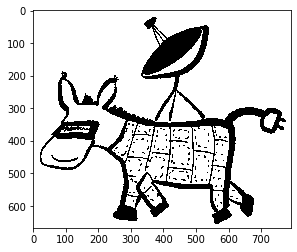

In [2]:
URL = "https://github.com/amsqi/iit21-homework/raw/main/material/donkey.png"
ORIGINAL = plt.imread(io.BytesIO(urllib.request.urlopen(URL).read()))

# remove alpha channel
if ORIGINAL.shape[2] == 4:
    alpha = ORIGINAL[:, :, 3:]
    ORIGINAL = ORIGINAL[:, :, :3] * alpha + (1 - alpha)

# convert to black & white
WHITE_THRESHOLD = 0.8
ORIGINAL = np.where(ORIGINAL[:, :, :3].max(axis=2) > WHITE_THRESHOLD, 0, 1)

# show the figure
plt.imshow(ORIGINAL, cmap=plt.get_cmap("binary"), interpolation="none")
plt.show()

All inputs and outputs should be 2d arrays that contain only zeros and ones (corresponding to black&white images).
For example:

In [3]:
ORIGINAL.shape

(668, 791)

In [4]:
set(ORIGINAL.flatten())

{0, 1}

# The Noise Channel

The following function should model a noise channel with probability of bit flip $f$.
<span style="background-color: yellow">Right now it does nothing -- can you fix this?</span>

*Hint: Never modify an input parameter. If you really need to, make a copy (`output = input.copy()`) before you start modifying.*

In [5]:
# Rolling a d-100 (using random package), and flipping bit if roll < dice
def noise_channel(f, input):
    output = np.array(input)
    for y in range(len(output)):
      for x in range(len(output[0])):
        if random.randrange(0,100)/100 < f:
          if output[y][x] == 1:
            output[y][x] = 0
          else:
            output[y][x] = 1
    return output

You can test your implementation with the following code:

In [6]:
NOISE_RATE = .1
output = noise_channel(NOISE_RATE, ORIGINAL)

f_est = np.mean(output != ORIGINAL)
print(f"{NOISE_RATE:3.0%} bit flips expected")
print(f"{f_est:3.0%} bit flips detected")

10% bit flips expected
10% bit flips detected


# The Repetition Code

The following two functions should implement the repetition code $R_3$.
<span style="background-color: yellow">Right now these functions do nothing at all either -- can you fix this?</span>

In [7]:
# Repeat each bit N times, and then make the result a 2d matrix again.
def encode(source, N=3):
    return np.repeat(source, N).reshape((source.shape[0], source.shape[1]*N))

# for every N bits take the majority vote.
def decode(received, N=3):
    return np.array([[1 if sum(received[y][x:x+N]) > N/2 else 0 for x in 
                      range(0, len(received[0]), N)] for y in range(len(received))])

__Disclaimer:__ We are taking the majority vote because $NOISE\_RATE < 0.5$. If the $NOISE\_RATE > 0.5$, the minority vote should be taken.

You can test your solution with the following code:

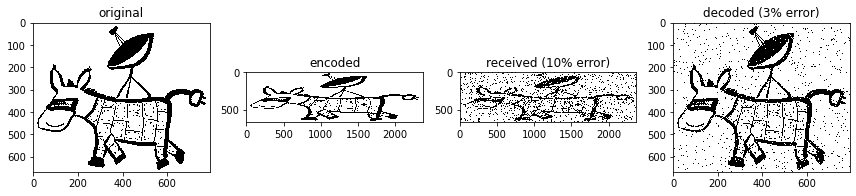

In [8]:
# simulate channel
encoded = encode(ORIGINAL)

received = noise_channel(NOISE_RATE, encoded)
assert received.shape == encoded.shape, "Noise channel should not change image size."

decoded = decode(received)
assert (
    decoded.shape == ORIGINAL.shape
), "Decoder should produce image of same size as the original."


# compute statistics
f_raw = np.mean(received != encoded)
f_dec = np.mean(decoded != ORIGINAL)

# plot pictures
fig, row = plt.subplots(1, 4, figsize=(12, 12))

row[0].set_title("original")
row[0].imshow(ORIGINAL, cmap=plt.get_cmap("binary"), interpolation="none")

row[1].set_title("encoded")
row[1].imshow(encoded, cmap=plt.get_cmap("binary"), interpolation="none")

row[2].set_title(f"received ({f_raw:.0%} error)")
row[2].imshow(received, cmap=plt.get_cmap("binary"), interpolation="none")

row[3].set_title(f"decoded ({f_dec:.0%} error)")
row[3].imshow(decoded, cmap=plt.get_cmap("binary"), interpolation="none")

fig.tight_layout()

Does your code look similar to Figure 1.11 in [MacKay's book](http://www.inference.org.uk/itprnn/book.pdf)?

__answer:__ Yes the image looks intact, with a tiny percentage of the bits flipped, which is most notable on the white background, which has black dots on it after decoding. Similarly to Figure 1.11 (Both pictures also have the same error percentage, so they have the same amount of noise in them).

**Bonus challenges (completely optional):**
1. Change your code to implement the repetition code $R_5$.
2. Change your code to implement the repetition code $R_k$ for general $k$. How does the error of the decoded image change as a function of $f$ and $k$?

__answer:__ The error is equal to the probability that more then half of the bits are flipped. So for $R_3$, this is $3f^2$

The general formula for error is: $Nf^{[\frac{N}{2} + \frac{1}{2}]}$, here $[\frac{N}{2} + \frac{1}{2}]$ means dividing N by 2 and then rounding to nearest integer.

please enter k (int > 0):11


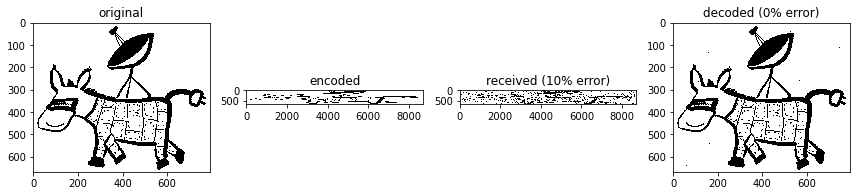

In [9]:
k = int(input('please enter k (int > 0):'))
# simulate channel
encoded = encode(ORIGINAL, k)

received = noise_channel(NOISE_RATE, encoded)
assert received.shape == encoded.shape, "Noise channel should not change image size."

decoded = decode(received, k)
assert (
    decoded.shape == ORIGINAL.shape
), "Decoder should produce image of same size as the original."


# compute statistics
f_raw = np.mean(received != encoded)
f_dec = np.mean(decoded != ORIGINAL)

# plot pictures
fig, row = plt.subplots(1, 4, figsize=(12, 12))

row[0].set_title("original")
row[0].imshow(ORIGINAL, cmap=plt.get_cmap("binary"), interpolation="none")

row[1].set_title("encoded")
row[1].imshow(encoded, cmap=plt.get_cmap("binary"), interpolation="none")

row[2].set_title(f"received ({f_raw:.0%} error)")
row[2].imshow(received, cmap=plt.get_cmap("binary"), interpolation="none")

row[3].set_title(f"decoded ({f_dec:.0%} error)")
row[3].imshow(decoded, cmap=plt.get_cmap("binary"), interpolation="none")

fig.tight_layout()